# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
df=pd.read_csv('../data/Wholesale customers data.csv')
df


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [6]:
df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

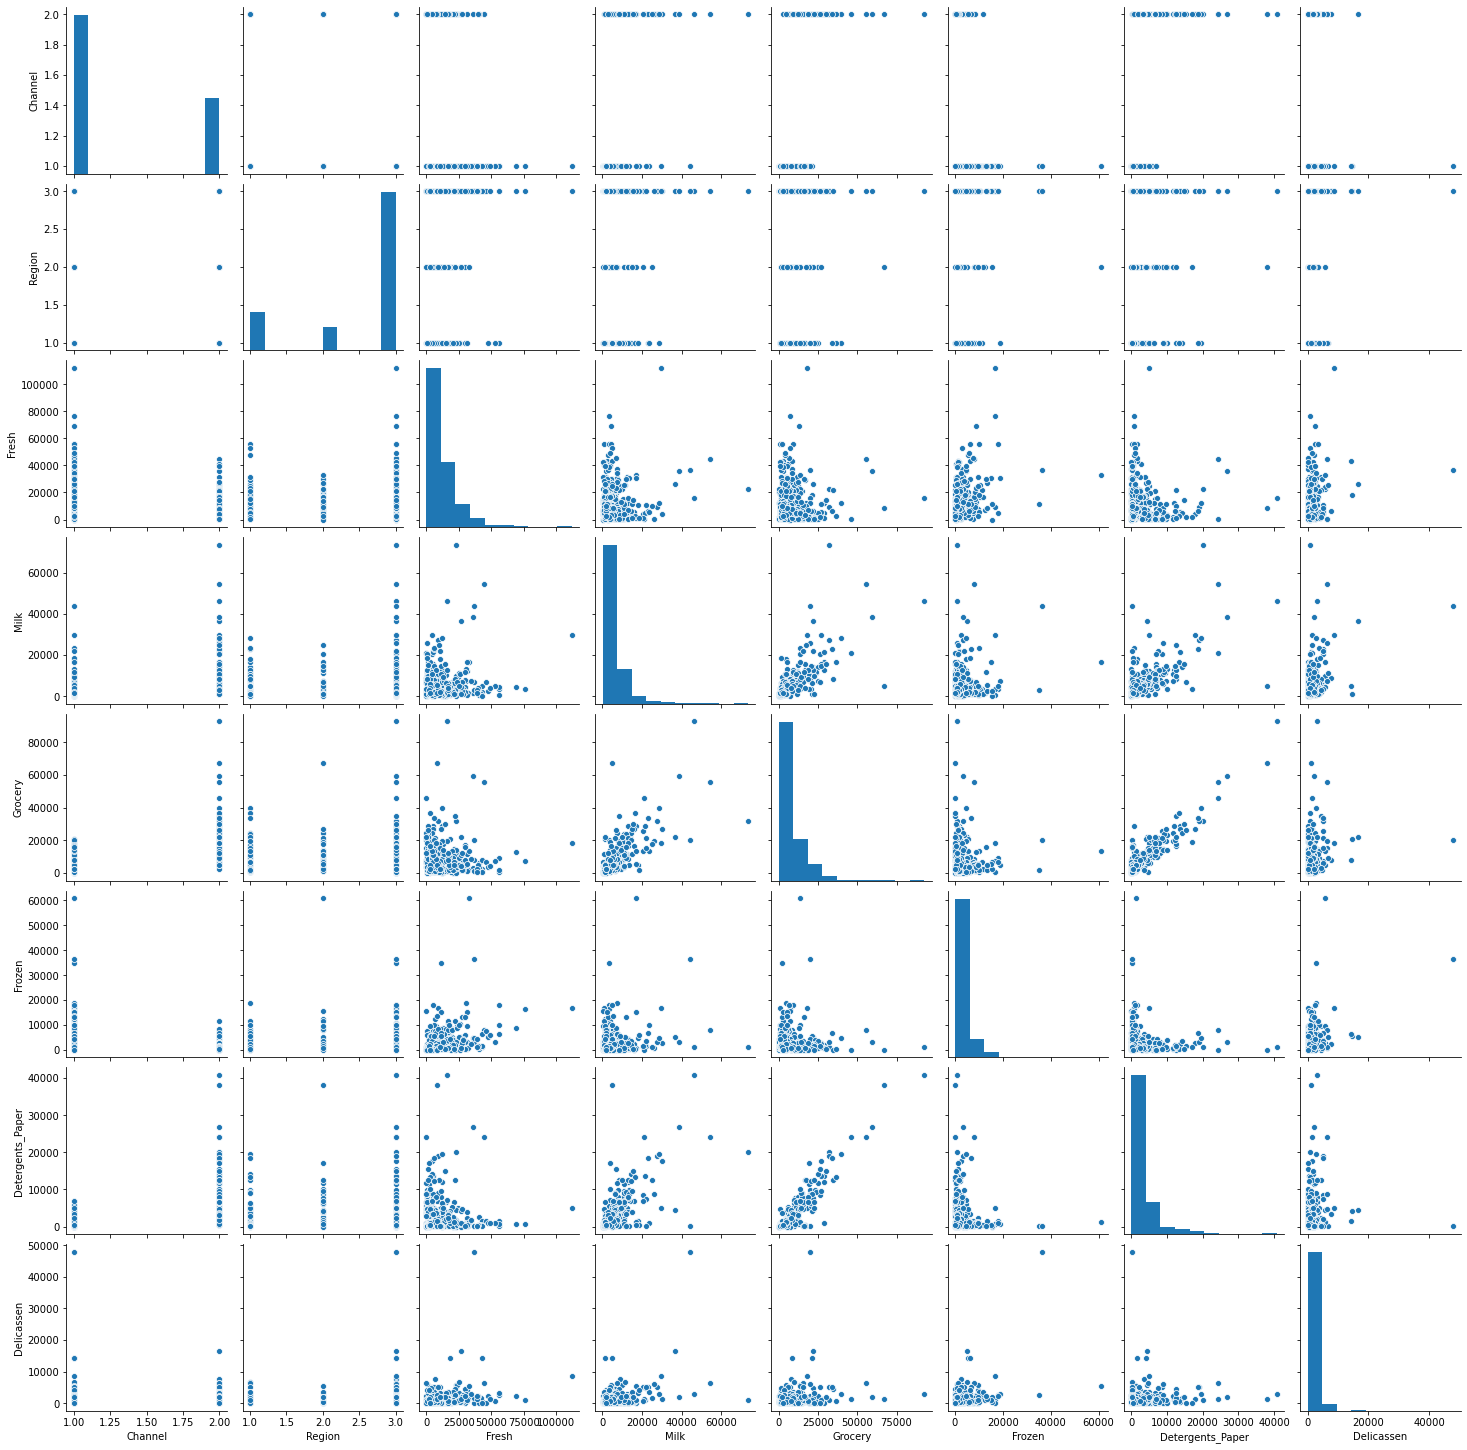

In [7]:
sns.pairplot(data=df);

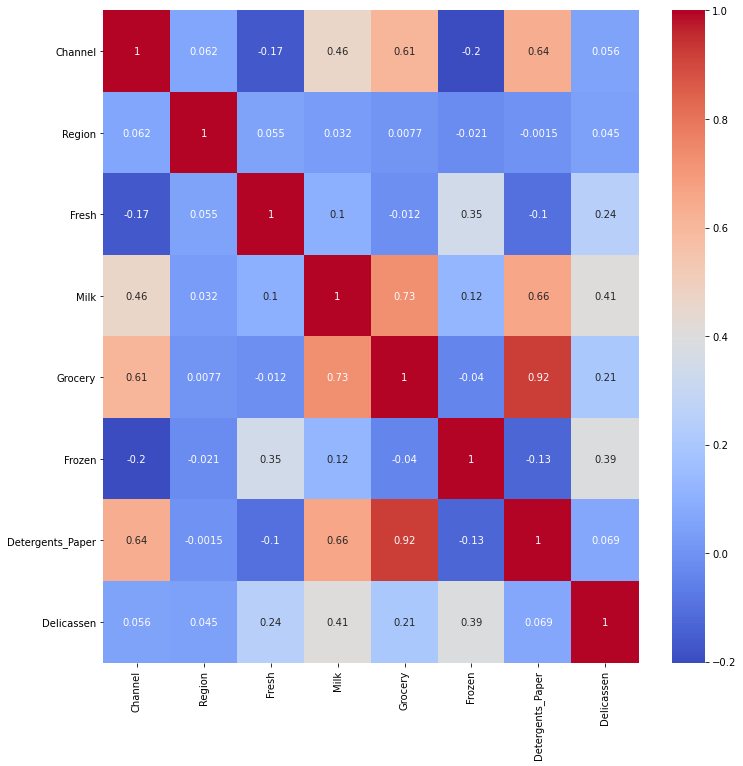

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

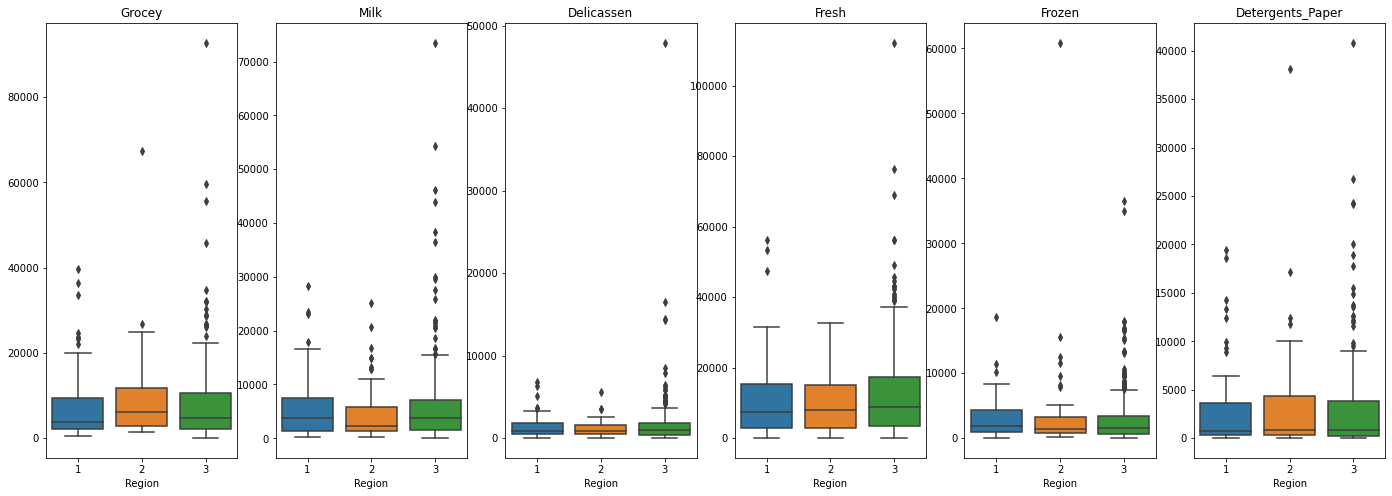

In [9]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6,figsize=(24,8))

sns.boxplot(x='Region', y='Grocery', data=df, ax=ax1).set_title('Grocey')
ax1.set_ylabel("")  # remove y label, but keep ticks

sns.boxplot(x="Region", y="Milk", data=df, ax=ax2).set_title('Milk')
ax2.set_ylabel("")  # remove y label, but keep ticks

sns.boxplot(x="Region", y="Delicassen", data=df, ax=ax3).set_title('Delicassen')
ax3.set_ylabel("")  # remove y label, but keep ticks

sns.boxplot(x="Region", y="Fresh", data=df, ax=ax4).set_title('Fresh')
ax4.set_ylabel("")  # remove y label, but keep ticks

sns.boxplot(x="Region", y="Frozen", data=df, ax=ax5).set_title('Frozen')
ax5.set_ylabel("")  # remove y label, but keep ticks

sns.boxplot(x="Region", y="Detergents_Paper", data=df, ax=ax6).set_title('Detergents_Paper')
ax6.set_ylabel("")  # remove y label, but keep ticks


plt.show()


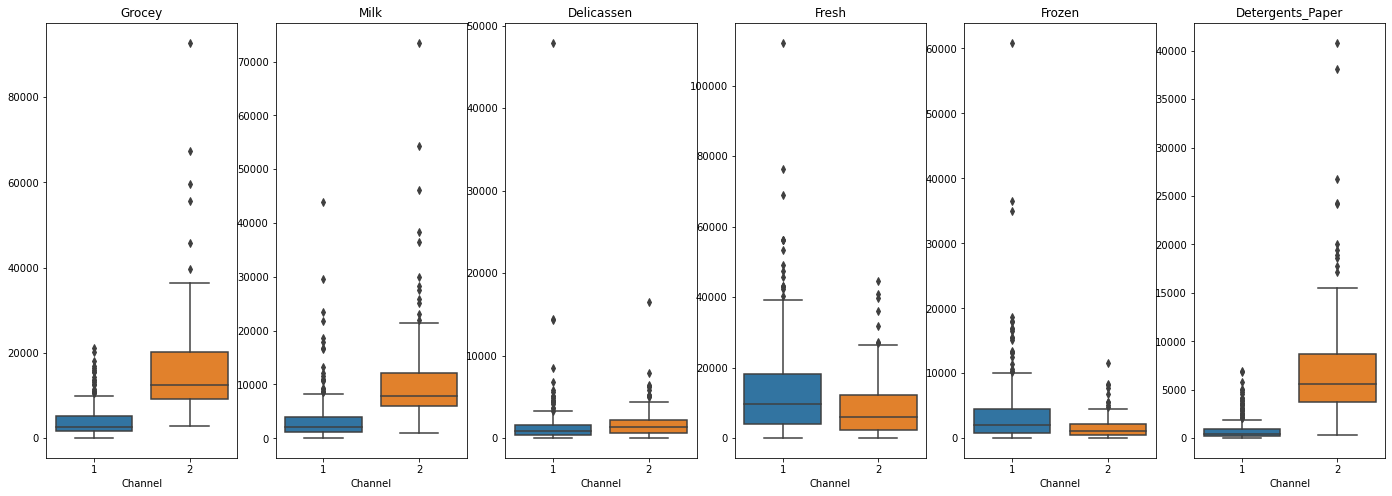

In [10]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6,figsize=(24,8))

sns.boxplot(x='Channel', y='Grocery', data=df, ax=ax1).set_title('Grocey')
ax1.set_ylabel("")  # remove y label, but keep ticks

sns.boxplot(x="Channel", y="Milk", data=df, ax=ax2).set_title('Milk')
ax2.set_ylabel("")  # remove y label, but keep ticks

sns.boxplot(x="Channel", y="Delicassen", data=df, ax=ax3).set_title('Delicassen')
ax3.set_ylabel("")  # remove y label, but keep ticks

sns.boxplot(x="Channel", y="Fresh", data=df, ax=ax4).set_title('Fresh')
ax4.set_ylabel("")  # remove y label, but keep ticks

sns.boxplot(x="Channel", y="Frozen", data=df, ax=ax5).set_title('Frozen')
ax5.set_ylabel("")  # remove y label, but keep ticks

sns.boxplot(x="Channel", y="Detergents_Paper", data=df, ax=ax6).set_title('Detergents_Paper')
ax6.set_ylabel("")  # remove y label, but keep ticks


plt.show()


Text(0, 0.5, '')

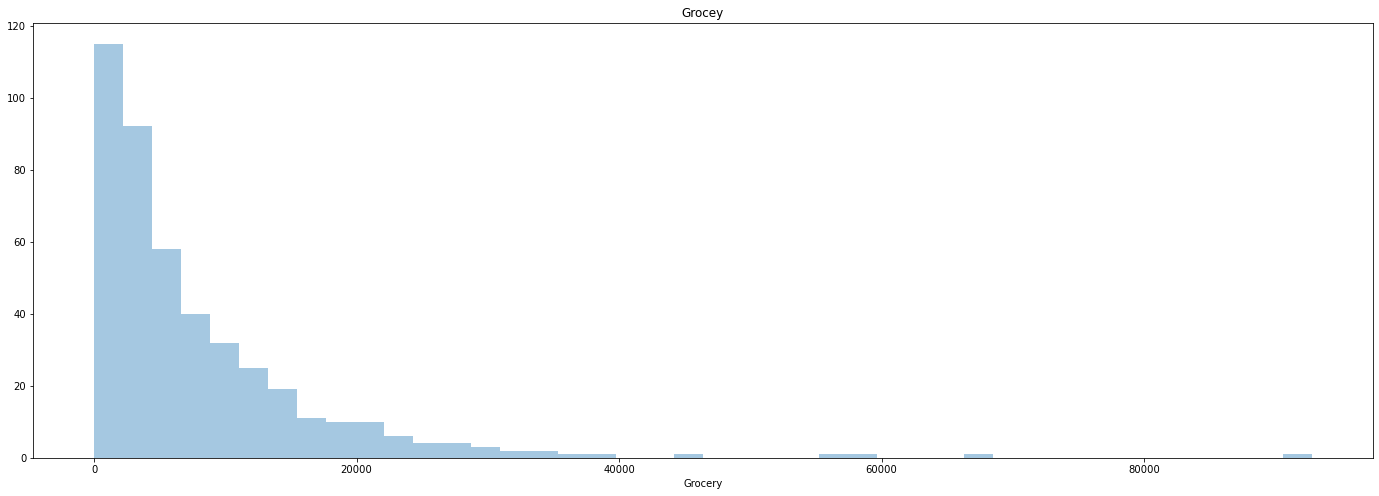

In [11]:
fig, ax1 = plt.subplots(1,1,figsize=(24,8))

sns.distplot(df['Grocery'], kde=False, ax=ax1).set_title('Grocey')
ax1.set_ylabel("")  # remove y label, but keep ticks


In [12]:
# Your observations here
# - There are two cathegorical columns (Region and Channel). We have to transform in numerical unless they are represented by numbers.
# - The other columns represent for clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) 
#   on diverse product categories.
# - There is no nulls data to remove. Nevertheless, the minimum values looks like are not real data because these values are too low
#   to be real data in a business. They maybe are outliers. 
# - In the heat map we can see few correlation between columns. Only we can highlight the correlation between Grocery and Detergents-Paper and Milk. For the rest columns
#   there are no correlations.
# - There are some outliers, that we should delete if we want to do a prediction. Always outliers are misperformace about any prediction because this data are far from the mean
# - The data distribution is not normal. It is skewed to the low values. The range of values are very different. There are maximun around 112.000, 73000, 92000, 40000, .. 
#   You can see in the histograms


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [13]:
# Your code here

# First we are going to delete outliers with PYOD, a library usefull for clean outliers

from pyod.models.knn import KNN                      # Import pyod library 
 
X = df                                               # We are going to estimate outlier according KNN model (distance between neighbours)
clf = KNN(contamination=0.03)                        # We estimate the 0.03% of outliers. We can increase or decrease this figure
clf.fit(X)                                           
y_pred = clf.predict(X)                              # We predict the outliers (1=outliers, 0=inliers)
df10=X[y_pred == 0]                                   # Filter to create the new dataframe
df11=X[y_pred == 1]
df10.reset_index(inplace=True)
df10=df10.drop('index', 1)
df10

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
422,1,3,29703,12051,16027,13135,182,2204
423,1,3,39228,1431,764,4510,93,2346
424,2,3,14531,15488,30243,437,14841,1867
425,1,3,10290,1981,2232,1038,168,2125


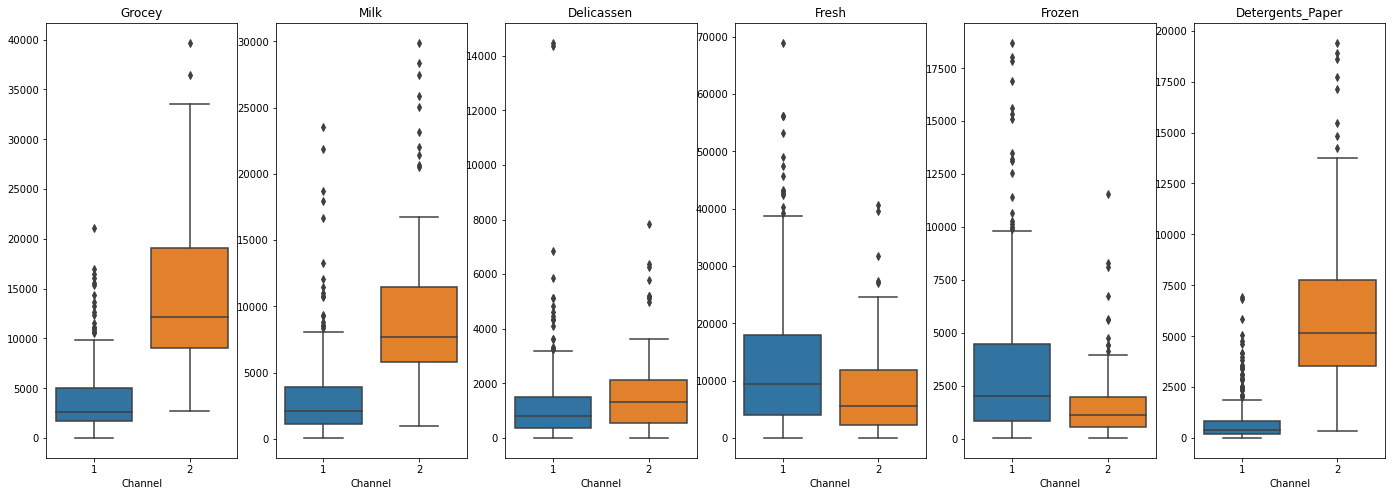

In [14]:
# Plot the new dataframe and check outliers

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6,figsize=(24,8))

sns.boxplot(x='Channel', y='Grocery', data=df10, ax=ax1).set_title('Grocey')
ax1.set_ylabel("")  # remove y label, but keep ticks

sns.boxplot(x="Channel", y="Milk", data=df10, ax=ax2).set_title('Milk')
ax2.set_ylabel("")  # remove y label, but keep ticks

sns.boxplot(x="Channel", y="Delicassen", data=df10, ax=ax3).set_title('Delicassen')
ax3.set_ylabel("")  # remove y label, but keep ticks

sns.boxplot(x="Channel", y="Fresh", data=df10, ax=ax4).set_title('Fresh')
ax4.set_ylabel("")  # remove y label, but keep ticks

sns.boxplot(x="Channel", y="Frozen", data=df10, ax=ax5).set_title('Frozen')
ax5.set_ylabel("")  # remove y label, but keep ticks

sns.boxplot(x="Channel", y="Detergents_Paper", data=df10, ax=ax6).set_title('Detergents_Paper')
ax6.set_ylabel("")  # remove y label, but keep ticks


plt.show()                          # We compare below plots with above plots, below plots have bigger boxes because there are less outliers


In [15]:
## Transform the two cathegorical columns

df10['Channel'].replace([1, 2],['C1','C2'], inplace=True)              
df10['Region'].replace([1, 2, 3],['R1','R2', 'R3'], inplace=True)
df10

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,C2,R3,12669,9656,7561,214,2674,1338
1,C2,R3,7057,9810,9568,1762,3293,1776
2,C2,R3,6353,8808,7684,2405,3516,7844
3,C1,R3,13265,1196,4221,6404,507,1788
4,C2,R3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
422,C1,R3,29703,12051,16027,13135,182,2204
423,C1,R3,39228,1431,764,4510,93,2346
424,C2,R3,14531,15488,30243,437,14841,1867
425,C1,R3,10290,1981,2232,1038,168,2125


In [16]:
# Here we are going to replace cathegorical columns (Channel and Region) by numerical.

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(df10.select_dtypes(include='object'))
X_encoded

<427x5 sparse matrix of type '<class 'numpy.float64'>'
	with 854 stored elements in Compressed Sparse Row format>

In [17]:
df_cat=pd.DataFrame(X_encoded.todense())
df_cat

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
422,1.0,0.0,0.0,0.0,1.0
423,1.0,0.0,0.0,0.0,1.0
424,0.0,1.0,0.0,0.0,1.0
425,1.0,0.0,0.0,0.0,1.0


In [18]:
df_num=df10.select_dtypes('number')
df_num

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
422,29703,12051,16027,13135,182,2204
423,39228,1431,764,4510,93,2346
424,14531,15488,30243,437,14841,1867
425,10290,1981,2232,1038,168,2125


In [19]:
df_new=pd.concat([df_cat, df_num], axis=1)     # Create the new dataframe
df_new

,0,1,2,3,4,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.0,1.0,0.0,0.0,1.0,12669,9656,7561,214,2674,1338
1,0.0,1.0,0.0,0.0,1.0,7057,9810,9568,1762,3293,1776
2,0.0,1.0,0.0,0.0,1.0,6353,8808,7684,2405,3516,7844
3,1.0,0.0,0.0,0.0,1.0,13265,1196,4221,6404,507,1788
4,0.0,1.0,0.0,0.0,1.0,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...,...,...
422,1.0,0.0,0.0,0.0,1.0,29703,12051,16027,13135,182,2204
423,1.0,0.0,0.0,0.0,1.0,39228,1431,764,4510,93,2346
424,0.0,1.0,0.0,0.0,1.0,14531,15488,30243,437,14841,1867
425,1.0,0.0,0.0,0.0,1.0,10290,1981,2232,1038,168,2125


In [20]:
# Your comment here

# We have modified dataframe

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [21]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(df_num.select_dtypes(include='number'))

In [24]:
customer_scale=pd.DataFrame(X_numeric_scaled)

customer_scale=pd.concat([df_cat, customer_scale], axis=1)     # Create the new dataframe
customer_scale.columns=[0,1,2,3,4,5,6,7,8,9,10]
customer_scale_00=customer_scale
customer_scale

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.0,1.0,0.121399,0.911980,0.068103,-0.786287,0.047847,0.003104
1,0.0,1.0,0.0,0.0,1.0,-0.384260,0.942690,0.358336,-0.303338,0.222818,0.290362
2,0.0,1.0,0.0,0.0,1.0,-0.447693,0.742872,0.085890,-0.102734,0.285852,4.269999
3,1.0,0.0,0.0,0.0,1.0,0.175100,-0.775106,-0.414895,1.144884,-0.564691,0.298232
4,0.0,1.0,0.0,0.0,1.0,1.017565,0.065246,0.015610,0.368360,-0.205704,2.526120
...,...,...,...,...,...,...,...,...,...,...,...
422,1.0,0.0,0.0,0.0,1.0,1.656216,1.389589,1.292374,3.244837,-0.656557,0.571061
423,1.0,0.0,0.0,0.0,1.0,2.514449,-0.728243,-0.914813,0.553989,-0.681714,0.664191
424,0.0,1.0,0.0,0.0,1.0,0.289171,2.074992,3.348153,-0.716715,3.487049,0.350043
425,1.0,0.0,0.0,0.0,1.0,-0.092957,-0.618562,-0.702525,-0.529213,-0.660515,0.519250


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [25]:
# Your code here:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42).fit(customer_scale)

print(len(kmeans.labels_))
customers=pd.DataFrame(kmeans.labels_, columns=['labels'])
customers

427


,labels
0,0
1,9
2,3
3,7
4,3
...,...
422,7
423,5
424,1
425,4


Count the values in `labels`.

In [26]:
# Your code here:
customers['labels'].value_counts()

4    130
2     65
9     59
7     39
0     35
5     33
6     30
3     23
1     11
8      2
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [27]:
# Your code here

from sklearn.cluster import DBSCAN

dbscan_c = DBSCAN(eps=0.5, min_samples=3).fit(customer_scale)

customers['labels_DBSCAN']=dbscan_c.labels_


Count the values in `labels_DBSCAN`.

In [28]:
# Your code here

customers['labels_DBSCAN'].value_counts()

-1    302
 0     95
 3      9
 6      4
 5      4
 4      4
 1      3
 7      3
 2      3
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

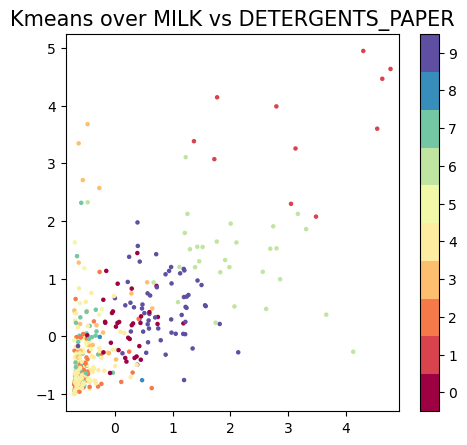

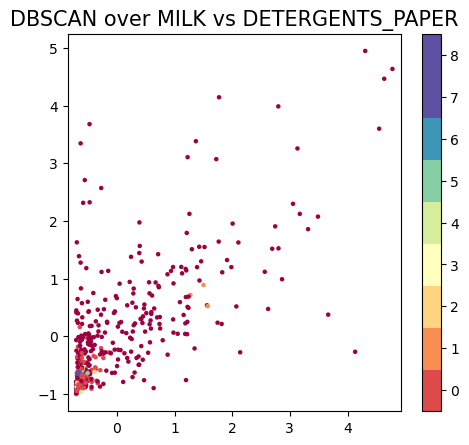

In [29]:
# Your code here:

plt.figure(figsize=(5.375, 5), dpi=100)
plt.scatter(customer_scale[9], customer_scale[6], c=customers['labels'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(customers['labels'])) + 1) - 0.5).set_ticks(np.arange(len(np.unique(customers['labels']))))
plt.title('Kmeans over MILK vs DETERGENTS_PAPER', fontsize=15)
plt.show()

plt.figure(figsize=(5.375, 5), dpi=100)
plt.scatter(customer_scale[9], customer_scale[6], c=customers['labels_DBSCAN'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(customers['labels_DBSCAN'])) + 1) - 0.5).set_ticks(np.arange(len(np.unique(customers['labels_DBSCAN']))))
plt.title('DBSCAN over MILK vs DETERGENTS_PAPER', fontsize=15)
plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

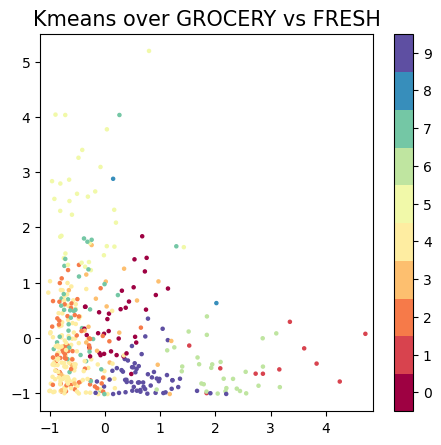

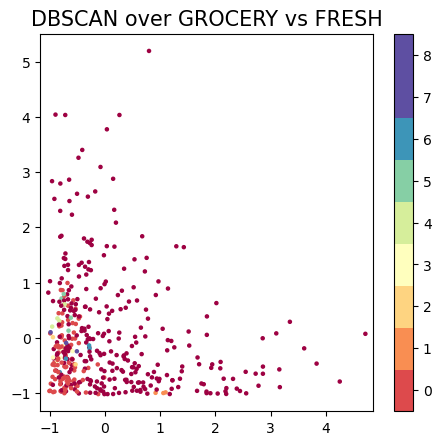

In [30]:
# Your code here:

plt.figure(figsize=(5.375, 5), dpi=100)
plt.scatter(customer_scale[7], customer_scale[5], c=customers['labels'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(customers['labels'])) + 1) - 0.5).set_ticks(np.arange(len(np.unique(customers['labels']))))
plt.title('Kmeans over GROCERY vs FRESH', fontsize=15);

plt.figure(figsize=(5.375, 5), dpi=100)
plt.scatter(customer_scale[7], customer_scale[5], c=customers['labels_DBSCAN'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(customers['labels_DBSCAN'])) + 1) - 0.5).set_ticks(np.arange(len(np.unique(customers['labels_DBSCAN']))))
plt.title('DBSCAN over GROCERY vs FRESH', fontsize=15);

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

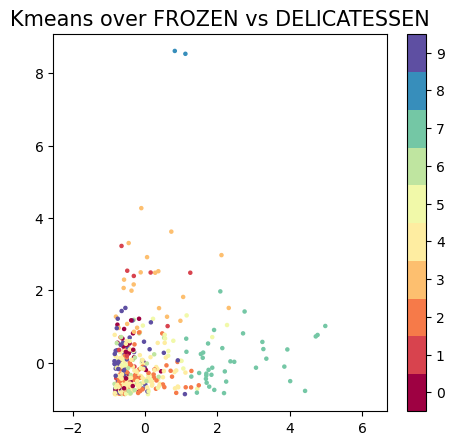

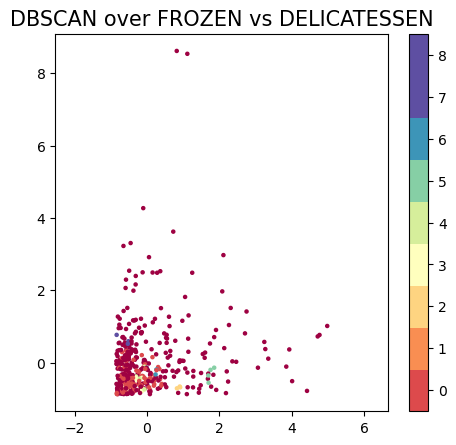

In [31]:
# Your code here:

plt.figure(figsize=(5.375, 5), dpi=100)
plt.scatter(customer_scale[8], customer_scale[10], c=customers['labels'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(customers['labels'])) + 1) - 0.5).set_ticks(np.arange(len(np.unique(customers['labels']))))
plt.title('Kmeans over FROZEN vs DELICATESSEN', fontsize=15);

plt.figure(figsize=(5.375, 5), dpi=100)
plt.scatter(customer_scale[8], customer_scale[10], c=customers['labels_DBSCAN'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(customers['labels_DBSCAN'])) + 1) - 0.5).set_ticks(np.arange(len(np.unique(customers['labels_DBSCAN']))))
plt.title('DBSCAN over FROZEN vs DELICATESSEN', fontsize=15);

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [32]:
# Your code here:
customer_scale=pd.concat([customer_scale, customers], axis=1) 
customer_scale.columns=['Channel_1','Channel_2','Region_1','Region_2','Region_3','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen','labels','labels_DBSCAN']
customer_scale

,Channel_1,Channel_2,Region_1,Region_2,Region_3,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,0.0,1.0,0.0,0.0,1.0,0.121399,0.911980,0.068103,-0.786287,0.047847,0.003104,0,-1
1,0.0,1.0,0.0,0.0,1.0,-0.384260,0.942690,0.358336,-0.303338,0.222818,0.290362,9,-1
2,0.0,1.0,0.0,0.0,1.0,-0.447693,0.742872,0.085890,-0.102734,0.285852,4.269999,3,-1
3,1.0,0.0,0.0,0.0,1.0,0.175100,-0.775106,-0.414895,1.144884,-0.564691,0.298232,7,-1
4,0.0,1.0,0.0,0.0,1.0,1.017565,0.065246,0.015610,0.368360,-0.205704,2.526120,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,1.0,0.0,0.0,0.0,1.0,1.656216,1.389589,1.292374,3.244837,-0.656557,0.571061,7,-1
423,1.0,0.0,0.0,0.0,1.0,2.514449,-0.728243,-0.914813,0.553989,-0.681714,0.664191,5,-1
424,0.0,1.0,0.0,0.0,1.0,0.289171,2.074992,3.348153,-0.716715,3.487049,0.350043,1,-1
425,1.0,0.0,0.0,0.0,1.0,-0.092957,-0.618562,-0.702525,-0.529213,-0.660515,0.519250,4,7


In [33]:

df1 = customer_scale.groupby('labels') \
       .agg({'Channel_1':'mean','Channel_2':'mean','Region_1':'mean','Region_2':'mean','Region_3':'mean','Fresh':'mean','Milk':'mean','Grocery':'mean','Frozen':'mean','Detergents_Paper':'mean','Delicassen':'mean'}) \
       .reset_index()
display(df1)

df2 = customer_scale.groupby('labels_DBSCAN') \
       .agg({'Channel_1':'mean','Channel_2':'mean','Region_1':'mean','Region_2':'mean','Region_3':'mean','Fresh':'mean','Milk':'mean','Grocery':'mean','Frozen':'mean','Detergents_Paper':'mean','Delicassen':'mean'}) \
       .reset_index()
display(df2)


,labels,Channel_1,Channel_2,Region_1,Region_2,Region_3,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,0.000000,1.000000,0.028571,0.114286,0.857143,0.317340,0.164158,0.231133,-0.470552,0.192346,0.017682
1,1,0.000000,1.000000,0.272727,0.090909,0.636364,-0.423537,3.623482,3.086619,-0.160422,3.236992,1.285748
2,2,0.984615,0.015385,0.692308,0.307692,0.000000,-0.171875,-0.545194,-0.569526,-0.141578,-0.507018,-0.343512
3,3,0.826087,0.173913,0.217391,0.000000,0.782609,0.142389,0.613311,-0.004177,0.159223,-0.314383,2.012797
4,4,1.000000,0.000000,0.000000,0.000000,1.000000,-0.307589,-0.568063,-0.634496,-0.302486,-0.539727,-0.396595
5,5,0.939394,0.060606,0.151515,0.060606,0.787879,2.374915,-0.260617,-0.347064,0.152638,-0.547422,0.035618
6,6,0.000000,1.000000,0.200000,0.200000,0.600000,-0.564800,1.346760,2.054209,-0.349252,1.973672,-0.138754
7,7,0.923077,0.076923,0.102564,0.153846,0.743590,0.467178,-0.257486,-0.419422,2.451370,-0.548745,0.080577
8,8,1.000000,0.000000,0.000000,0.000000,1.000000,1.753077,-0.386339,1.083050,0.969706,0.104946,8.577228
9,9,0.186441,0.813559,0.135593,0.101695,0.762712,-0.707098,0.484543,0.704668,-0.491606,0.814549,-0.075941


,labels_DBSCAN,Channel_1,Channel_2,Region_1,Region_2,Region_3,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-1,0.566225,0.433775,0.211921,0.135762,0.652318,0.128522,0.264917,0.273984,0.109765,0.225165,0.180329
1,0,1.000000,0.000000,0.000000,0.000000,1.000000,-0.350400,-0.659850,-0.695099,-0.372342,-0.582573,-0.453202
2,1,0.000000,1.000000,0.000000,0.000000,1.000000,-0.995070,0.709303,1.024074,-0.666174,1.450626,-0.703454
3,2,1.000000,0.000000,0.000000,0.000000,1.000000,-0.207117,-0.667686,-0.740509,0.884483,-0.573830,-0.686402
4,3,1.000000,0.000000,1.000000,0.000000,0.000000,-0.423555,-0.747586,-0.788745,-0.377971,-0.637022,-0.592326
5,4,1.000000,0.000000,1.000000,0.000000,0.000000,0.367155,-0.865144,-0.842544,-0.159670,-0.668217,-0.420241
6,5,1.000000,0.000000,0.000000,0.000000,1.000000,0.498841,-0.585309,-0.701549,1.753405,-0.561157,-0.314158
7,6,1.000000,0.000000,0.000000,1.000000,0.000000,-0.333397,-0.681180,-0.522485,0.118852,-0.645816,-0.210536
8,7,1.000000,0.000000,0.000000,0.000000,1.000000,-0.079111,-0.729705,-0.731495,-0.626656,-0.683976,0.625059


Which algorithm appears to perform better?

In [34]:
# Your observations here

# I do not see clearly grouping during this clustering process. In the plots above all the clusters are mixed and is not clear grouping. Only I see some colors grouped in 
#  the Kmean process.
# It seems that Kmean process classify in a better way because you can split by colors more or less.
# But I do not know why. It is a visual decision according to the plots

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

427


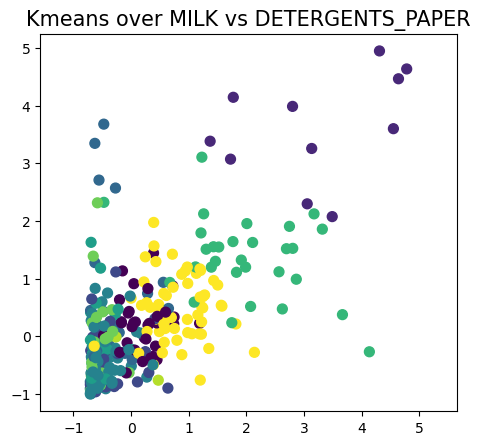

In [81]:
# Your code here
kmeans = KMeans(n_clusters=10, random_state=42).fit(customer_scale_00)          ## For 10 clusters

print(len(kmeans.labels_))
customers_10=pd.DataFrame(kmeans.labels_, columns=['labels'])

plt.figure(figsize=(5.375, 5), dpi=100)
plt.scatter(customer_scale_00[9], customer_scale_00[6], c=customers_10['labels'], s=50)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Kmeans over MILK vs DETERGENTS_PAPER', fontsize=15)
plt.show()

427


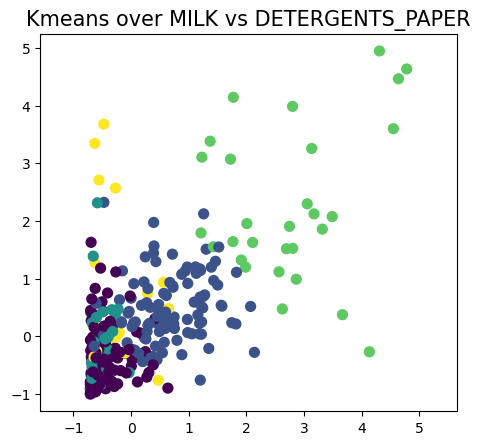

In [82]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(customer_scale_00)          ## For 5 clusters

print(len(kmeans.labels_))
customers_05=pd.DataFrame(kmeans.labels_, columns=['labels'])

plt.figure(figsize=(5.375, 5), dpi=100)
plt.scatter(customer_scale_00[9], customer_scale_00[6], c=customers_05['labels'], cmap='viridis', s=50)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Kmeans over MILK vs DETERGENTS_PAPER', fontsize=15)
plt.show()

427


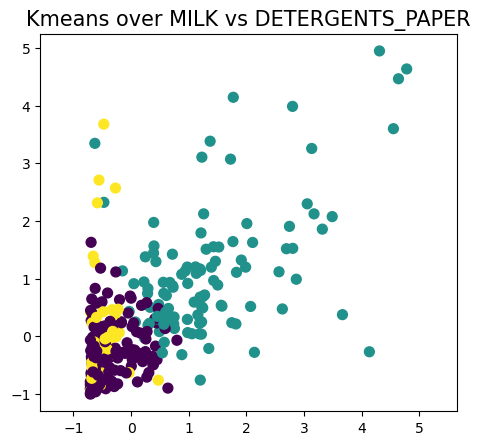

In [80]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(customer_scale_00)          ## For 3 clusters

print(len(kmeans.labels_))
customers_03=pd.DataFrame(kmeans.labels_, columns=['labels'])

plt.figure(figsize=(5.375, 5), dpi=100)
plt.scatter(customer_scale_00[9], customer_scale_00[6], c=customers_03['labels'], cmap='viridis', s=50)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Kmeans over MILK vs DETERGENTS_PAPER', fontsize=15)
plt.show()

In [ ]:
# Your comment here

# In that case looks the less the better, but there are some group mixed in the left bottom part of the plot.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

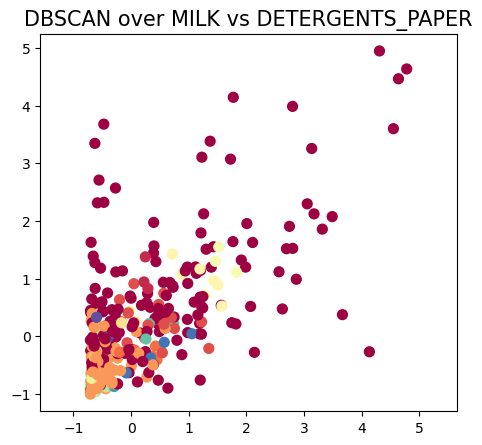

In [90]:
# Your code here

dbscan_c = DBSCAN(eps=0.75, min_samples=3).fit(customer_scale_00)                  ## eps=0.75 (more clusters)
customers_0305=pd.DataFrame(dbscan_c.labels_, columns=['labels_DBSCAN'])

plt.figure(figsize=(5.375, 5), dpi=100)
plt.scatter(customer_scale_00[9], customer_scale_00[6], c=customers_0305['labels_DBSCAN'], cmap='Spectral', s=50)
plt.gca().set_aspect('equal', 'datalim')
plt.title('DBSCAN over MILK vs DETERGENTS_PAPER', fontsize=15)
plt.show()

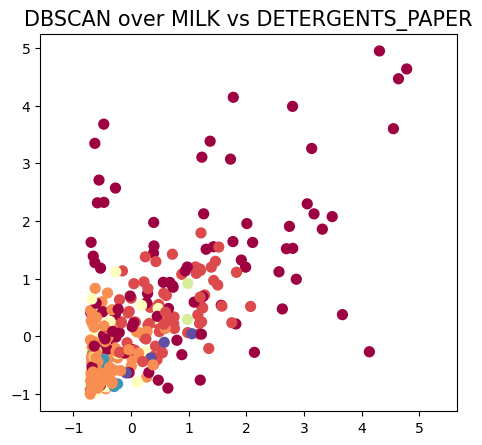

In [91]:
dbscan_c = DBSCAN(eps=1.0, min_samples=3).fit(customer_scale_00)                             ## eps=1.0 (more clusters)
customers_0310=pd.DataFrame(dbscan_c.labels_, columns=['labels_DBSCAN'])

plt.figure(figsize=(5.375, 5), dpi=100)
plt.scatter(customer_scale_00[9], customer_scale_00[6], c=customers_0310['labels_DBSCAN'], cmap='Spectral', s=50)
plt.gca().set_aspect('equal', 'datalim')
plt.title('DBSCAN over MILK vs DETERGENTS_PAPER', fontsize=15)
plt.show()

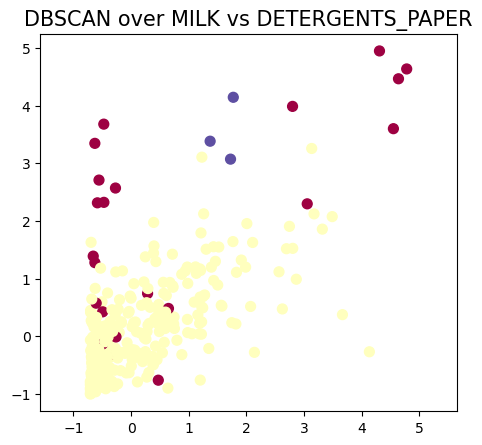

In [92]:
dbscan_c = DBSCAN(eps=2.0, min_samples=3).fit(customer_scale_00)                           ## eps=2.0 (less clusters)
customers_0320=pd.DataFrame(dbscan_c.labels_, columns=['labels_DBSCAN'])

plt.figure(figsize=(5.375, 5), dpi=100)
plt.scatter(customer_scale_00[9], customer_scale_00[6], c=customers_0320['labels_DBSCAN'], cmap='Spectral', s=50)
plt.gca().set_aspect('equal', 'datalim')
plt.title('DBSCAN over MILK vs DETERGENTS_PAPER', fontsize=15)
plt.show()

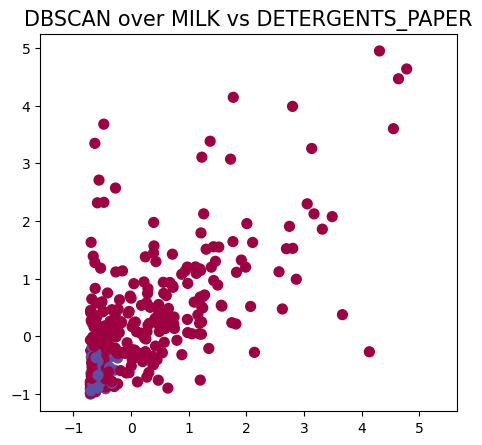

In [93]:
dbscan_c = DBSCAN(eps=0.5, min_samples=5).fit(customer_scale_00)                          ## number of min_samples=5 (less clusters)
customers_0505=pd.DataFrame(dbscan_c.labels_, columns=['labels_DBSCAN'])

plt.figure(figsize=(5.375, 5), dpi=100)
plt.scatter(customer_scale_00[9], customer_scale_00[6], c=customers_0505['labels_DBSCAN'], cmap='Spectral', s=50)
plt.gca().set_aspect('equal', 'datalim')
plt.title('DBSCAN over MILK vs DETERGENTS_PAPER', fontsize=15)
plt.show()

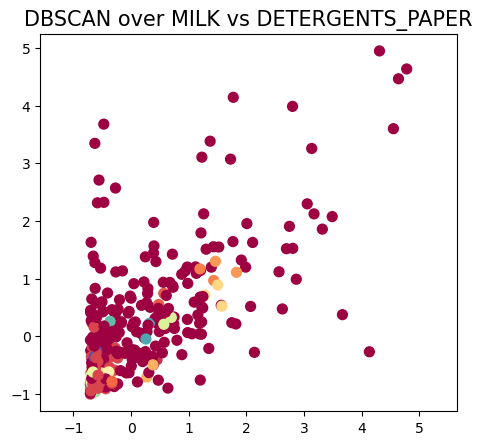

In [95]:
dbscan_c = DBSCAN(eps=0.5, min_samples=2).fit(customer_scale_00)                              ## number of min_samples=2 (little more clusters)
customers_0205=pd.DataFrame(dbscan_c.labels_, columns=['labels_DBSCAN'])

plt.figure(figsize=(5.375, 5), dpi=100)
plt.scatter(customer_scale_00[9], customer_scale_00[6], c=customers_0205['labels_DBSCAN'], cmap='Spectral', s=50)
plt.gca().set_aspect('equal', 'datalim')
plt.title('DBSCAN over MILK vs DETERGENTS_PAPER', fontsize=15)
plt.show()

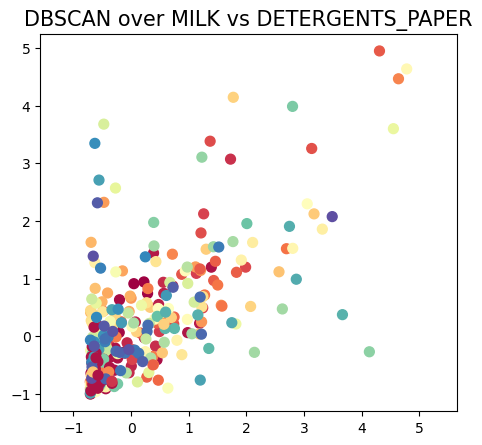

In [96]:
dbscan_c = DBSCAN(eps=0.5, min_samples=1).fit(customer_scale_00)                              ## number of min_samples=1 ( more clusters)
customers_0105=pd.DataFrame(dbscan_c.labels_, columns=['labels_DBSCAN'])

plt.figure(figsize=(5.375, 5), dpi=100)
plt.scatter(customer_scale_00[9], customer_scale_00[6], c=customers_0105['labels_DBSCAN'], cmap='Spectral', s=50)
plt.gca().set_aspect('equal', 'datalim')
plt.title('DBSCAN over MILK vs DETERGENTS_PAPER', fontsize=15)
plt.show()

In [ ]:
# Your comment here

# In that case if we reduce the number of min_samples, we increase the numbers of clusters and get worse performance
# In that case if we increase the eps, the numbers of clasters increases and get worse performance.